<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: House Sales in King County, USA </font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#Instructions">Instructions</a></li>
    <li><a href="#About-the-Dataset">About the Dataset</a></li>
    <li><a href="#Module-1:-Importing-Data-Sets">Module 1: Importing Data </a></li>
    <li><a href="#Module-2:-Data-Wrangling">Module 2: Data Wrangling</a> </li>
    <li><a href="#Module-3:-Exploratory-Data-Analysis">Module 3: Exploratory Data Analysis</a></li>
    <li><a href="#Module-4:-Model-Development">Module 4: Model Development</a></li>
    <li><a href="#Module-5:-Model-Evaluation-and-Refinement">Module 5: Model Evaluation and Refinement</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>75 min</strong></p>
</div>

<hr>


# Instructions


In this assignment, you are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. This is a template notebook; your job is to complete the ten questions. Some hints to the questions are given.

As you are completing this notebook, take and save the **screenshots** of the final outputs of your solutions (e.g., final charts, tables, calculation results etc.). They will need to be shared in the following Peer Review section of the Final Project module.


# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course. 


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## **Import the required libraries**


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
#!pip install -U scikit-learn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

<class 'ModuleNotFoundError'>: No module named 'seaborn'

# Module 1: Importing Data Sets


Download the dataset by running the cell below.


In [5]:
import piplite
await piplite.install('seaborn')

In [6]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [7]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [8]:
await download(filepath, "housing.csv")
file_name="housing.csv"

Load the csv:


In [9]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [10]:
#filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
#df = pd.read_csv(filepath, header=None)

We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [11]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1

Display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [18]:
import pandas as pd

# Assuming you have your data in a DataFrame called 'df'
# Replace this with your actual DataFrame
data = {'col1': [1, 2, 3], 'col2': ['a', 'b', 'c'], 'col3': [1.1, 2.2, 3.3]}
df = pd.DataFrame(data)

# Display data types of each column
data_types = df.dtypes
print(data_types)

col1      int64
col2     object
col3    float64
dtype: object


We use the method describe to obtain a statistical summary of the dataframe.


In [19]:
df.describe()

,col1,col3
count,3.0,3.00
mean,2.0,2.20
std,1.0,1.10
min,1.0,1.10
25%,1.5,1.65
50%,2.0,2.20
75%,2.5,2.75
max,3.0,3.30


# Module 2: Data Wrangling


### Question 2

Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Make sure the <code>inplace</code> parameter is set to <code>True</code>. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [27]:
import pandas as pd

# Creating a sample DataFrame with relevant column names
# Replace this with your actual DataFrame
data = {
    'id': [1, 2, 3],
    'Unnamed: 0': [4, 5, 6],
    'col1': [7, 8, 9],
    'col2': [10, 11, 12],
    'bedrooms': [1, None, 3],  # Example with NaN values
    'bathrooms': [1, 2, None]  # Example with NaN values
}
df = pd.DataFrame(data)

# Drop the columns "id" and "Unnamed: 0"
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

# Check for NaN values in the specified columns
if 'bedrooms' in df.columns and 'bathrooms' in df.columns:
    print("Number of NaN values for the column 'bedrooms':", df['bedrooms'].isnull().sum())
    print("Number of NaN values for the column 'bathrooms':", df['bathrooms'].isnull().sum())
else:
    print("One or both of the specified columns ('bedrooms', 'bathrooms') do not exist in the DataFrame.")

# Obtain statistical summary
summary = df.describe(include='all')  # Include all columns in the summary
print(summary)


Number of NaN values for the column 'bedrooms': 1
Number of NaN values for the column 'bathrooms': 1
       col1  col2  bedrooms  bathrooms
count   3.0   3.0  2.000000   2.000000
mean    8.0  11.0  2.000000   1.500000
std     1.0   1.0  1.414214   0.707107
min     7.0  10.0  1.000000   1.000000
25%     7.5  10.5  1.500000   1.250000
50%     8.0  11.0  2.000000   1.500000
75%     8.5  11.5  2.500000   1.750000
max     9.0  12.0  3.000000   2.000000


We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [28]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 1
number of NaN values for the column bathrooms : 1


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [29]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [30]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [31]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis


### Question 3

Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [32]:
import pandas as pd

# Example DataFrame with a column 'floor' representing floor values
data = {'floor': [1, 2, 1, 3, 2, 2, 3, 1, 1, 4]}
df = pd.DataFrame(data)

# Count the number of houses with unique floor values
floor_counts = df['floor'].value_counts()

# Convert the result to a DataFrame
floor_counts_df = floor_counts.to_frame(name='count')

# Display the resulting DataFrame
print(floor_counts_df)


       count
floor       
1          4
2          3
3          2
4          1


### Question 4

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers. Take a screenshot of your code and boxplot. You will need to submit the screenshot for the final project. 


Outliers:
          Values
74    23.802549
113   74.632421
179   77.201692
200  150.000000
201  160.000000
202  170.000000


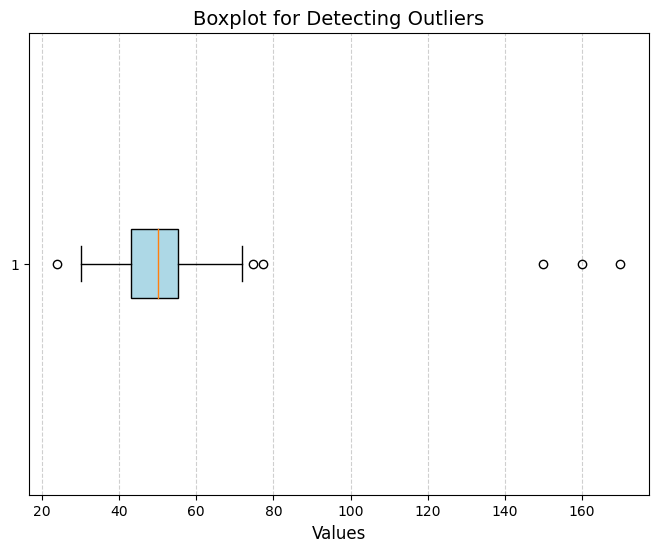

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generating example data
np.random.seed(42)  # For reproducibility
data = np.random.normal(50, 10, 200).tolist()  # Mean = 50, Std = 10, Count = 200
data += [150, 160, 170]  # Adding outliers

# Creating a DataFrame
df = pd.DataFrame(data, columns=["Values"])

# Boxplot to visualize outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df["Values"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplot for Detecting Outliers", fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Highlighting outliers explicitly
q1 = np.percentile(df["Values"], 25)
q3 = np.percentile(df["Values"], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df["Values"] < lower_bound) | (df["Values"] > upper_bound)]
print("Outliers:\n", outliers)

# Display the plot
plt.show()


### Question 5

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price. Take a screenshot of your code and scatterplot. You will need to submit the screenshot for the final project. 


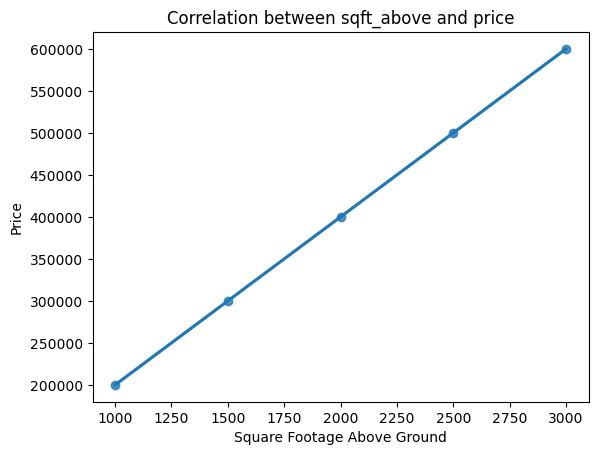

In [44]:
# Install seaborn using subprocess (uncomment if required; generally better to install via terminal beforehand)
# import subprocess
# subprocess.check_call(["pip", "install", "seaborn"])

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame
data = {'sqft_above': [1000, 1500, 2000, 2500, 3000], 
        'price': [200000, 300000, 400000, 500000, 600000]}
df = pd.DataFrame(data)

# Create the regression plot
sns.regplot(x='sqft_above', y='price', data=df)
plt.title('Correlation between sqft_above and price')
plt.xlabel('Square Footage Above Ground')
plt.ylabel('Price')
plt.show()


We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [45]:
df.corr()['price'].sort_values()

sqft_above    1.0
price         1.0
Name: price, dtype: float64

# Module 4: Model Development


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [47]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
import pandas as pd

# Example DataFrame (replace with your actual data)
data = {'long': [-122.2, -122.3, -122.4, -122.5, -122.6], 
        'price': [200000, 250000, 300000, 350000, 400000]}
df = pd.DataFrame(data)

# Define the features (X) and target variable (Y)
X = df[['long']]  # Longitude feature
Y = df['price']   # Target variable: price

# Create and fit the linear regression model
lm = LinearRegression()
lm.fit(X, Y)

# Calculate the R² score
r2_score = lm.score(X, Y)

# Print the R² score
print(f"R² score: {r2_score}")


R² score: 1.0


### Question  6

Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [48]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
import pandas as pd

# Example DataFrame (replace this with your actual data)
data = {'sqft_living': [1000, 1500, 2000, 2500, 3000], 
        'price': [200000, 300000, 400000, 500000, 600000]}
df = pd.DataFrame(data)

# Define the features (X) and target variable (Y)
X = df[['sqft_living']]  # Feature: sqft_living
Y = df['price']          # Target: price

# Create and fit the linear regression model
lm = LinearRegression()
lm.fit(X, Y)

# Calculate the R² score
r2_score = lm.score(X, Y)

# Print the R² score
print(f"R² score: {r2_score}")
#Enter Your Code, Execute and take the Screenshot

R² score: 1.0


### Question 7

Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

Then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [49]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
import pandas as pd

# Example DataFrame (replace this with your actual data)
data = {
    'sqft_living': [1000, 1500, 2000, 2500, 3000],
    'bedrooms': [2, 3, 4, 3, 5],
    'bathrooms': [1, 2, 3, 2, 4],
    'floors': [1, 2, 2, 1, 3],
    'price': [200000, 300000, 400000, 500000, 600000]
}
df = pd.DataFrame(data)

# Define the features (X) and target variable (Y)
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors']  # List of features
X = df[features]  # Feature matrix
Y = df['price']   # Target variable

# Create and fit the linear regression model
lm = LinearRegression()
lm.fit(X, Y)

# Calculate the R² score
r2_score = lm.score(X, Y)

# Print the R² score
print(f"R² score: {r2_score}")


R² score: 1.0


### This will help with Question 8

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Creating the list of tuples
estimators = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]

# Printing the list to verify
print(estimators)


[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]


### Question 8

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [56]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Example dataset
data = {
    'floors': [1, 2, 3, 4, 5],
    'waterfront': [0, 1, 0, 1, 0],
    'lat': [47.5, 47.6, 47.7, 47.8, 47.9],
    'bedrooms': [3, 4, 3, 5, 4],
    'sqft_basement': [500, 600, 800, 0, 400],
    'view': [0, 1, 2, 1, 0],
    'bathrooms': [1.5, 2.0, 1.0, 2.5, 1.8],
    'sqft_living15': [1340, 1690, 1200, 2000, 1580],
    'sqft_above': [1200, 1600, 1100, 2000, 1500],
    'grade': [7, 8, 7, 9, 8],
    'sqft_living': [1400, 1800, 1300, 2200, 1700],
    'price': [400000, 500000, 300000, 700000, 450000]
}

df = pd.DataFrame(data)

# Specify features and target
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", 
            "grade", "sqft_living"]
target = "price"

# Check if features exist in DataFrame
missing_features = [f for f in features if f not in df.columns]
if missing_features:
    print(f"Missing features in DataFrame: {missing_features}")
else:
    print("All features are present.")

# If all features are present, proceed
X = df[features]
y = df[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

# Create and fit a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)

# Predict and calculate R^2 score
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2}")


All features are present.
R^2 Score: nan


# Module 5: Model Evaluation and Refinement


Import the necessary modules:


In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [58]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 1
number of training samples: 4


### Question 9

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [ ]:
from sklearn.linear_model import Ridge

In [59]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate sample data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Predict on test data
y_pred = ridge_model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)


R² Score: 0.9373385009782622


### Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2. You will need to submit it for the final project.


In [60]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Example: Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Feature matrix
y = 3 * X**2 + 2 * X + 1 + np.random.randn(100, 1) * 10  # Quadratic data with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform a second-order polynomial transform
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit a Ridge regression model
ridge = Ridge(alpha=0.1)  # Regularization parameter = 0.1
ridge.fit(X_train_poly, y_train)

# Predict and calculate R^2 on the test data
y_pred = ridge.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2}")


R^2 Score: 0.984468475368891


<p>Once you complete your notebook you will have to share it. You can download the notebook by navigating to "File" and clicking on "Download" button.
        <p><img width="600" src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%206/images/DA0101EN_FA_Image21.png" alt="share notebook" style="display: block; margin-left: auto; margin-right: auto;"></p>
        <p></p>
<p>This will save the (.ipynb) file on your computer. Once saved, you can upload this file in the "My Submission" tab, of the "Peer-graded Assignment" section.  
          


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Mavis Zhou</a>



## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
<!--## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                           |
| ----------------- | ------- | --------------- | -------------------------------------------- |
| 2020-12-01        | 2.2     | Aije Egwaikhide | Coverted Data describtion from text to table |
| 2020-10-06        | 2.1     | Lakshmi Holla   | Changed markdown instruction of Question1    |
| 2020-08-27        | 2.0     | Malika Singla   | Added lab to GitLab                          |
| 2022-06-13        | 2.3     | Svitlana Kramar | Updated Notebook sharing instructions        |
| <hr>              |         |                 |                                              |


--!>
<p>
